In [64]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [69]:
#load movie data
movies_one_hot = pd.read_csv("movies_one_hot.csv")

# Print the first few rows of the DataFrame
print(movies_one_hot.head())

   runtime  rating      votes  gross_earn  director_avg_earn  Action  \
0    142.0     9.3  2626905.0       28.34          54.635000       0   
1    152.0     9.0  2598173.0      534.86         201.832222       1   
2    148.0     8.8  2304062.0      292.58         201.832222       1   
3    139.0     8.8  2071088.0       37.03          86.519000       0   
4    154.0     8.9  2011013.0      107.93          78.026250       0   

   Adventure  Animation  Biography  Comedy  ...  Horror  Music  Musical  \
0          0          0          0       0  ...       0      0        0   
1          0          0          0       0  ...       0      0        0   
2          1          0          0       0  ...       0      0        0   
3          0          0          0       0  ...       0      0        0   
4          0          0          0       0  ...       0      0        0   

   Mystery  Romance  Sci-Fi  Sport  Thriller  War  Western  
0        0        0       0      0         0    0      

In [70]:
movies_one_hot.columns

Index(['runtime', 'rating', 'votes', 'gross_earn', 'director_avg_earn',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [79]:
# Drop unwanted columns
movies_one_hot = movies_one_hot.drop(['gross_earn'], axis=1)

In [80]:
movies_one_hot.describe

<bound method NDFrame.describe of       runtime  rating      votes  director_avg_earn  Action  Adventure  \
0       142.0     9.3  2626905.0          54.635000       0          0   
1       152.0     9.0  2598173.0         201.832222       1          0   
2       148.0     8.8  2304062.0         201.832222       1          1   
3       139.0     8.8  2071088.0          86.519000       0          0   
4       154.0     8.9  2011013.0          78.026250       0          0   
...       ...     ...        ...                ...     ...        ...   
4995    102.0     7.3    25112.0          10.563333       0          0   
4996     94.0     5.9    28515.0          47.625520       0          0   
4997    106.0     8.1    23957.0          47.625520       0          0   
4998     92.0     7.0    21536.0           5.750000       0          0   
4999    120.0     7.6    25097.0          27.207778       0          0   

      Animation  Biography  Comedy  Crime  ...  Music  Musical  Mystery  \
0 

In [81]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
movies_scaled = scaler.fit_transform(movies_one_hot)


In [82]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Try 3 clusters as an initial guess
movies_one_hot['cluster'] = kmeans.fit_predict(movies_scaled)

# Check the number of movies per cluster
print(movies_one_hot['cluster'].value_counts())


cluster
1    2273
0    1747
2     980
Name: count, dtype: int64


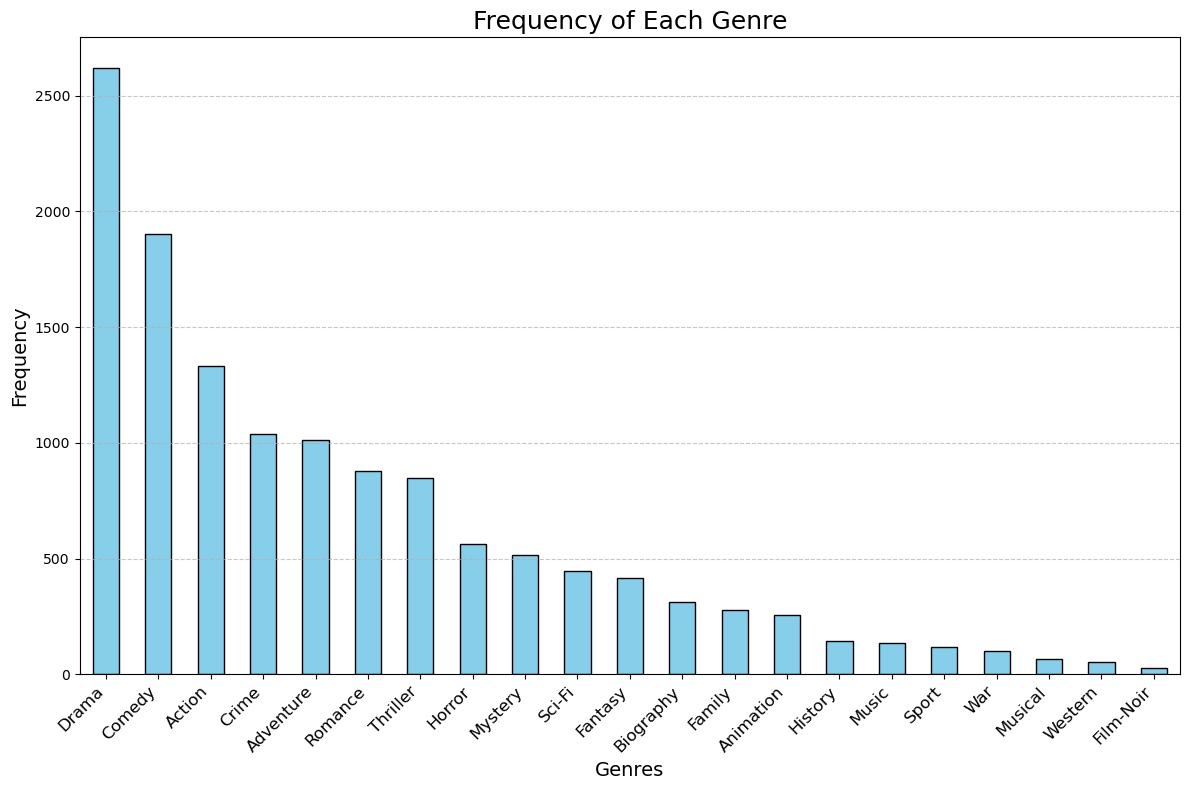

In [98]:
import pandas as pd
import matplotlib.pyplot as plt


# List of genre columns
genre_columns = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 
                 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 
                 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 
                 'Thriller', 'War', 'Western']

# Sum each genre column to calculate frequency
genre_frequencies = movies_one_hot[genre_columns].sum()

# Create a bar plot
plt.figure(figsize=(12, 8))
genre_frequencies.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Frequency of Each Genre', fontsize=18)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()


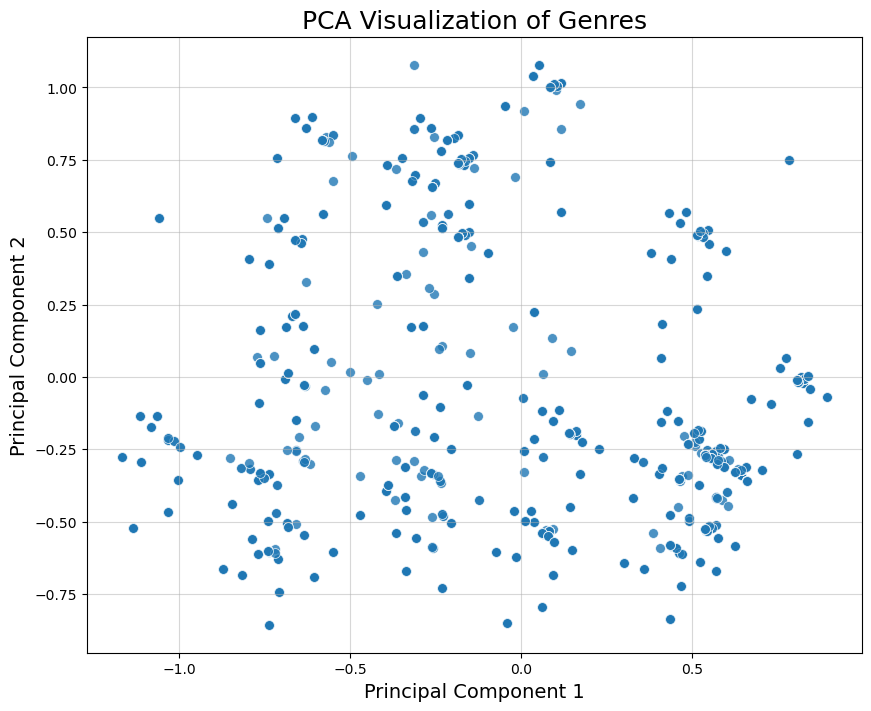

In [99]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Select only genre columns
genre_data = movies_one_hot[genre_columns]

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(genre_data)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Plot PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, s=50, alpha=0.8)
plt.title('PCA Visualization of Genres', fontsize=18)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.grid(alpha=0.5)
plt.show()


c:\Users\bekah\miniconda3\envs\cs110\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\bekah\miniconda3\envs\cs110\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


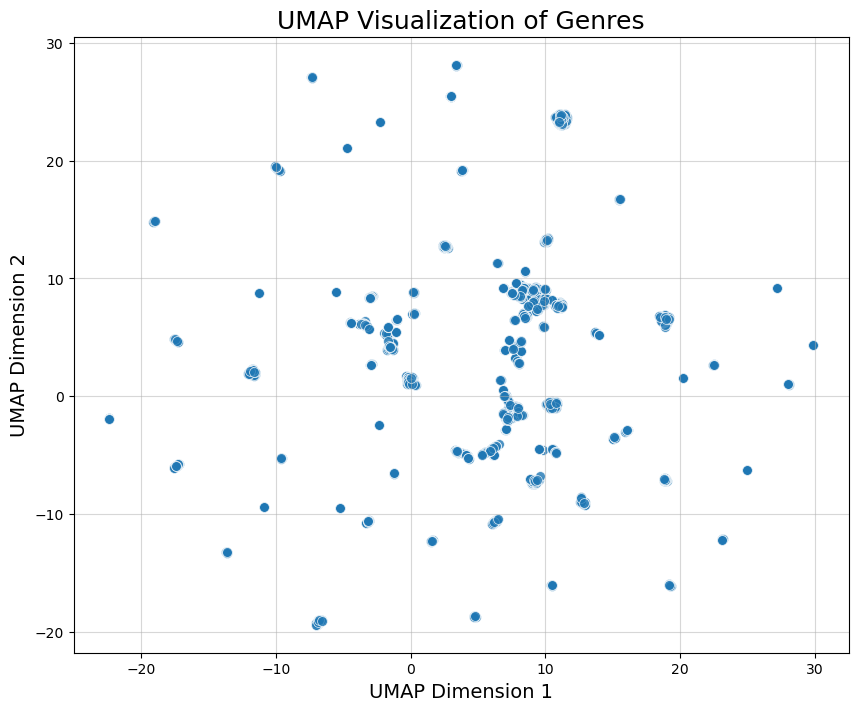

In [100]:
import umap.umap_ as umap

# Perform UMAP
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_result = umap_model.fit_transform(genre_data)

# Create a DataFrame for UMAP results
umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'])

# Plot UMAP results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', data=umap_df, s=50, alpha=0.8)
plt.title('UMAP Visualization of Genres', fontsize=18)
plt.xlabel('UMAP Dimension 1', fontsize=14)
plt.ylabel('UMAP Dimension 2', fontsize=14)
plt.grid(alpha=0.5)
plt.show()


In [95]:
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)

# Fit and transform the data
tsne_results = tsne.fit_transform(movies_one_hot)


C:\Users\bekah\AppData\Local\Temp\ipykernel_4552\4144979416.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Dim1', y='Dim2', data=tsne_df, palette='viridis')


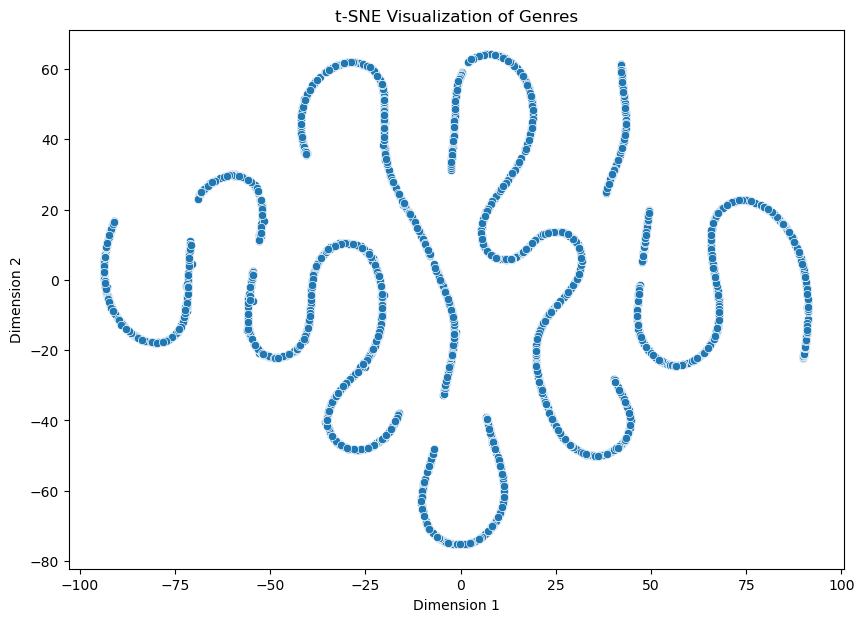

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert t-SNE results into a DataFrame
tsne_df = pd.DataFrame(tsne_results, columns=['Dim1', 'Dim2'])

# Plot the results
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Dim1', y='Dim2', data=tsne_df, palette='viridis')
plt.title('t-SNE Visualization of Genres')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


Curved Structures:
The points form distinct winding, non-linear paths rather than random or tightly clustered groups. This pattern suggests that the data might have inherent relationships that t-SNE has preserved, but it might not correspond directly to distinct clusters.

No Clear Clusters:
Unlike some datasets where t-SNE forms tightly grouped clusters, this visualization does not show distinct separations, implying the genres may not naturally group into sharply distinct categories in the reduced space. Instead, genres could be blending into one another.

Diversity Across Dimensions:
The spread across dimensions implies variance between genres but possibly also redundancy in some features. This could mean certain genres share overlapping characteristics or are part of continuous trends rather than categorical separations.

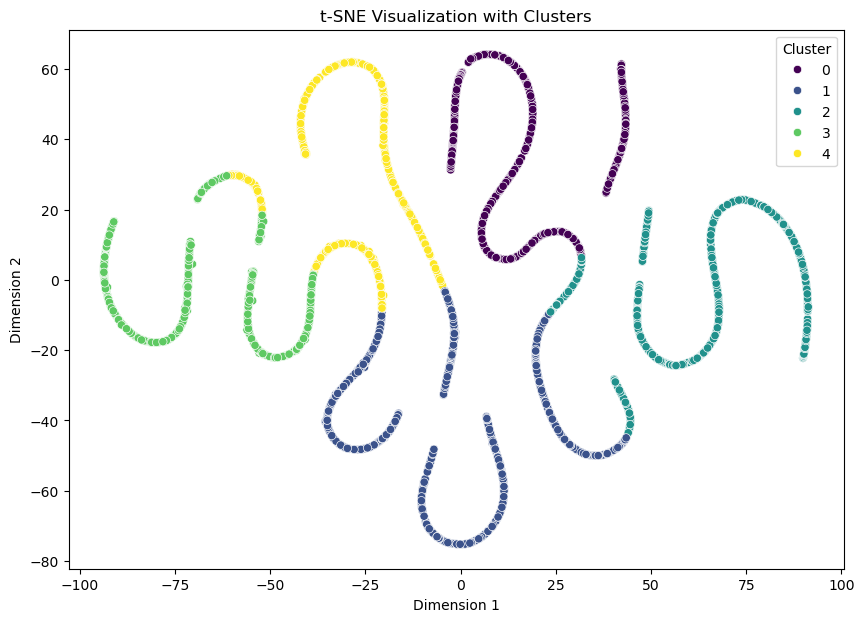

In [97]:
from sklearn.cluster import KMeans

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Choose an appropriate number of clusters
tsne_df['Cluster'] = kmeans.fit_predict(tsne_results)

# Plot the t-SNE with clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Dim1', y='Dim2', hue='Cluster', data=tsne_df, palette='viridis')
plt.title('t-SNE Visualization with Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(title='Cluster')
plt.show()


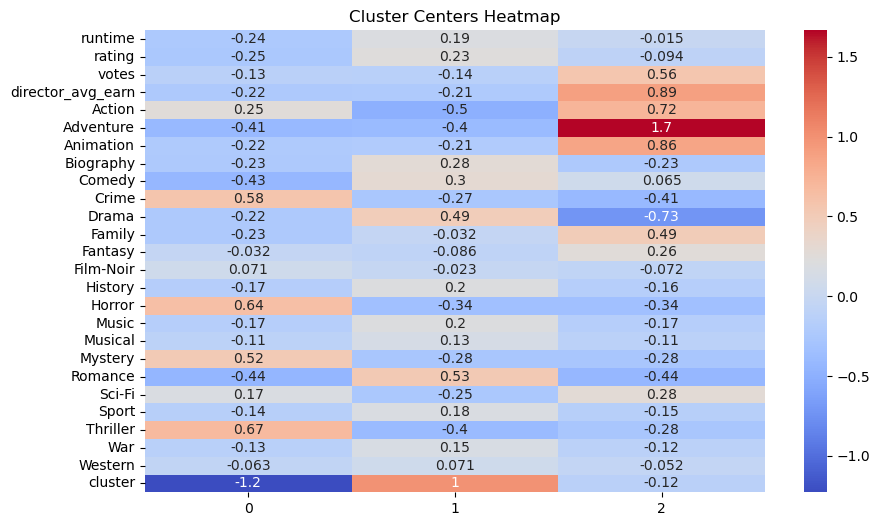

In [ ]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=movies_one_hot.columns[:kmeans.cluster_centers_.shape[1]])

# Plot a heatmap of cluster centers
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_centers.T, annot=True, cmap="coolwarm")
plt.title("Cluster Centers Heatmap")
plt.show()

Cluster 0 (Left Column):

This cluster seems to be characterized by lower values for most features.
It shows relatively higher values for Drama, Mystery, and Thriller genres.
This cluster might represent movies with more serious themes, often with genres like drama, mystery, or thriller.
Cluster 1 (Middle Column):

This cluster has a diverse range of values, suggesting a mix of movie types.
It shows relatively higher values for Comedy, Romance, and Family genres.
This cluster might represent a mix of movies with different themes, including comedies, romances, and family-friendly films.
Cluster 2 (Right Column):

This cluster is characterized by higher values for Action, Adventure, Sci-Fi, and Fantasy genres.
It also has higher values for gross_earn and director_avg_earn.
This cluster likely contains popular, high-budget movies with action-packed or fantastical themes.

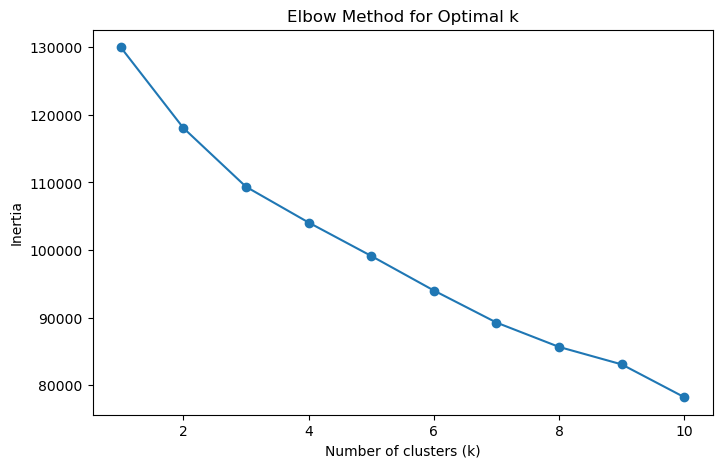

In [86]:
# Elbow method to find the optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(movies_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


Overall Interpretation:

The elbow plot shows the relationship between the number of clusters (k) and the within-cluster sum of squares (inertia). The goal is to find the "elbow point" where the decrease in inertia starts to level off. This point suggests the optimal number of clusters for the data.
Specific Observations:

Steep Drop: Initially, as the number of clusters increases, the inertia decreases rapidly. This indicates that each additional cluster is significantly reducing the variability within the clusters.
Elbow Point: Around k=4, the curve starts to flatten out. This is a potential "elbow point" where adding more clusters doesn't significantly reduce the inertia.
Gradual Decrease: Beyond the elbow point, the decrease in inertia becomes more gradual, suggesting that adding more clusters might not be adding much value.
Interpretation of the Elbow Point (k=4):

The elbow point at k=4 suggests that using 4 clusters might be a good choice for this dataset. This means that the data can be divided into 4 distinct groups, each with relatively low internal variability.

Important Considerations:

Domain Knowledge: The optimal number of clusters can also depend on domain knowledge and the specific goals of the analysis. Sometimes, a different number of clusters might be more meaningful based on the context.
Other Methods: While the elbow method is a common approach, other methods like the silhouette method can also be used to determine the optimal number of clusters.
Additional Insights:

Cluster Analysis: Once we've determined the optimal number of clusters, we can considor using clustering algorithms like K-means or hierarchical clustering to group the data points into these clusters.
Cluster Interpretation: We can analyze the characteristics of each cluster to understand the underlying patterns and relationships within the data.

In [ ]:
#pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#!pip install imbalanced-learn

In [87]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

In [89]:
#reload data to get gross_earn column back
#load movie data
movies_one_hot = pd.read_csv("movies_one_hot.csv")

# Print the first few rows of the DataFrame
print(movies_one_hot.head())

   runtime  rating      votes  gross_earn  director_avg_earn  Action  \
0    142.0     9.3  2626905.0       28.34          54.635000       0   
1    152.0     9.0  2598173.0      534.86         201.832222       1   
2    148.0     8.8  2304062.0      292.58         201.832222       1   
3    139.0     8.8  2071088.0       37.03          86.519000       0   
4    154.0     8.9  2011013.0      107.93          78.026250       0   

   Adventure  Animation  Biography  Comedy  ...  Horror  Music  Musical  \
0          0          0          0       0  ...       0      0        0   
1          0          0          0       0  ...       0      0        0   
2          1          0          0       0  ...       0      0        0   
3          0          0          0       0  ...       0      0        0   
4          0          0          0       0  ...       0      0        0   

   Mystery  Romance  Sci-Fi  Sport  Thriller  War  Western  
0        0        0       0      0         0    0      

In [90]:
print(movies_one_hot.columns)


Index(['runtime', 'rating', 'votes', 'gross_earn', 'director_avg_earn',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')


In [15]:
#pip install --upgrade xgboost


In [16]:
#pip show xgboost


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import xgboost as xgb

movies_one_hot['is_good'] = (movies_one_hot['gross_earn'] >= 50).astype(int)
y = movies_one_hot['is_good']


# Use numeric features from movies_one_hot,  excluding 'gross_earn' to avoid data leakage
X = movies_one_hot.drop(columns=['gross_earn', 'is_good'])  # Dropping 'gross_earn' and 'is_good'
y = movies_one_hot['is_good']

# Step 1: Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Apply SMOTE to the training data (unscaled)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Step 3: Scale numeric features (fit on training set only)
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_val_scaled = scaler.transform(X_val)

# Step 4: Define parameter grid for hyperparameter tuning
params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
}

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 5: Initialize GridSearchCV with XGBoost and the parameter grid
grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', early_stopping_rounds=10),
    param_grid=params,
    scoring='roc_auc',
    cv=cv
)

# Step 6: Fit GridSearchCV on the resampled training data
grid_search.fit(X_train_res_scaled, y_train_res, eval_set=[(X_val_scaled, y_val)], verbose=False)

# Step 7: Get the best model
best_model = grid_search.best_estimator_

# Step 8: Evaluate the model
y_pred = best_model.predict(X_val_scaled)
print("Classification Report:")
print(classification_report(y_val, y_pred))

# Step 9: Calculate and print ROC-AUC score
y_prob = best_model.predict_proba(X_val_scaled)[:, 1]
roc_score = roc_auc_score(y_val, y_prob)
print(f"ROC-AUC Score: {roc_score:.2f}")

# Step 10: Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.90       687
           1       0.74      0.85      0.79       313

    accuracy                           0.86      1000
   macro avg       0.83      0.86      0.84      1000
weighted avg       0.87      0.86      0.86      1000

ROC-AUC Score: 0.93
Confusion Matrix:
[[594  93]
 [ 46 267]]


ROC-AUC Score (0.93):
A score of 0.93 indicates that the model is excellent at distinguishing between the two classes (good vs. not good). The ROC-AUC score being close to 1.0 is a sign of high predictive power.

Classification Report:

Precision:
For class 0 (not good), precision is 93%, meaning the model correctly predicts most movies as "not good" when it says so.
For class 1 (good), precision is 74%, which is still quite good, though slightly lower, meaning some "good" predictions may be incorrect.
Recall:
Class 0 has a recall of 86%, meaning the model captures most "not good" movies correctly.
Class 1 has a recall of 85%, which is impressive because it successfully identifies most "good" movies.
F1-Score:
The F1-scores for both classes (0.90 and 0.79) show a good balance between precision and recall, with stronger performance for class 0.
Confusion Matrix:

The model correctly classified:
594 out of 687 "not good" movies (true negatives).
267 out of 313 "good" movies (true positives).
Misclassifications:
93 "not good" movies were incorrectly predicted as "good" (false positives).
46 "good" movies were incorrectly predicted as "not good" (false negatives).
Insights:
Strengths: The model is robust and performs well across both classes, especially given the imbalanced nature of the dataset. SMOTE has likely contributed to the strong performance for the minority class (class 1).
Areas for Potential Improvement:
The precision for class 1 could be improved by tuning the decision threshold or tweaking hyperparameters further.
Reducing false positives (93) might also make the model more precise.

In [ ]:
print(X_train.describe())
print(X_val.describe())

           runtime       rating         votes  director_avg_earn       Action  \
count  4000.000000  4000.000000  4.000000e+03        4000.000000  4000.000000   
mean    110.259000     6.702500  1.362038e+05          47.235292     0.263500   
std      21.694702     0.970139  2.010707e+05          48.264777     0.440586   
min      45.000000     1.500000  1.848700e+04           0.000000     0.000000   
25%      96.000000     6.100000  3.749550e+04          14.201250     0.000000   
50%     106.000000     6.800000  6.842000e+04          36.770000     0.000000   
75%     120.000000     7.400000  1.439732e+05          63.601429     1.000000   
max     366.000000     9.300000  2.626905e+06         415.000000     1.000000   

         Adventure    Animation    Biography      Comedy        Crime  ...  \
count  4000.000000  4000.000000  4000.000000  4000.00000  4000.000000  ...   
mean      0.200750     0.049500     0.064250     0.38050     0.205000  ...   
std       0.400611     0.216937     